# House Price Prediction in Bengaluru



This notebook provides an analysis and predictive modeling approach for house prices in Bengaluru, India. The goal is to clean and preprocess the data, explore relevant features, and build a model to predict house prices based on available data. The steps include:
- Data Loading
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Building and Evaluation


### Data Set

Link : https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

The dataset used in this project is "Bengaluru_House_Data.csv". It contains various columns such as area type, location, size, total square feet, and price, among others. The dataset will undergo preprocessing to handle missing values, feature engineering, and outlier treatment.

## 1. Setup

### Importing Libraries

We start by importing the necessary libraries for data manipulation (pandas, numpy) and data visualization (matplotlib). The %matplotlib inline magic command is used to display plots inline within the notebook. We also set the default figure size for plots.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Loading the Data Set

The data loading section involves reading the dataset and inspecting its initial structure. The dataset, Bengaluru_House_Data.csv, is loaded into a pandas DataFrame df1 using pd.read_csv(). The .head() method is called to display the first few rows of the DataFrame, providing an overview of the data. The shape of the DataFrame is checked to understand its dimensions, and the distribution of different area_type values is evaluated using the groupby method combined with agg('count'). This initial inspection helps to understand the data's structure and identify any obvious issues or patterns.

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## 2. Data Cleaning and Preprocessing

This section focuses on preparing the data for analysis by handling missing values and transforming columns. Unnecessary columns (area_type, society, balcony, availability) are dropped, and missing values are assessed. Rows with missing values are removed to ensure the quality of the dataset. The size column is transformed into a new column bhk (number of bedrooms) by extracting the integer value from the size description. Additional transformations handle the total_sqft column, which is converted to numerical values using custom functions to deal with ranges and non-numeric values.

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.shape

(13320, 5)

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\abiji\AppData\Local\Temp\ipykernel_30140\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## 3. Exploratory Data Analysis (EDA)
EDA involves analyzing the data to uncover patterns and outliers. This section examines the distribution of price_per_sqft and identifies locations with insufficient data. Outliers in the price_per_sqft are handled by grouping the data by location and applying statistical methods to remove anomalous values. Scatter plots are used to visualize the relationship between total_sqft and price for different bhk values, which helps in understanding pricing trends and identifying further outliers. Histograms are used to visualize the distribution of price_per_sqft and bath values.

In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Data Transformation

As we can see that there are range values in the 'total_sqft' column, for exploring this columns we need to transform this column as suitable for further analysis.

The is_float function attempts to convert its input into a float; if it fails (i.e., the conversion raises an exception), the function returns False, indicating that the value is not a float-compatible string. The apply method is then used on the total_sqft column to apply this function across all entries. The boolean inversion (~) is applied to select rows where is_float returns False, meaning these rows contain values that cannot be interpreted as floats. The .head(10) method displays the first ten such rows. This process is essential for data cleaning, as it helps in identifying and addressing problematic entries in the dataset that could lead to errors or inaccurate analyses due to incorrect or non-numeric values in the total_sqft column.

In [19]:
def is_float(x):
    try:
        float(x)
    except:
     return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_into_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
convert_sqft_into_num('2100 - 2850')

2475.0

In [23]:
convert_sqft_into_num('34.46Sq. Meter')

In [24]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_into_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


The function convert_sqft_into_num(x) is designed to process and convert different formats of square footage input into a numerical value. The function first splits the input string x by the hyphen ('-') character. If the result of the split operation yields exactly two tokens, it assumes that the input represents a range of square footage values (e.g., "1000-1500"). In this case, the function calculates the average of these two values by converting them to floats and returning their mean. If the input does not contain a hyphen, the function attempts to directly convert the string into a float. If the conversion fails (due to invalid input format), the function handles this exception by returning None. This approach ensures that the function can robustly handle both single square footage values and ranges, providing a meaningful numerical output for further processing or analysis.

#### Creating a new feature

A new feature price_per_sqft is created to standardize the price per unit area, which can be useful in the modeling process.

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df5.location.unique())

1304

#### Handling Categorical Data

The following code section cleans the 'location' column by removing any leading or trailing whitespace. Next, it calculates the frequency of each location and identifies those with 10 or fewer occurrences. Locations with low frequency are grouped under a common category labeled 'other' to consolidate less common entries and reduce the number of unique values. The code then addresses outliers by filtering out listings where the ratio of total square footage to the number of bedrooms is less than 300, as these might indicate data entry errors or unrealistic listings. This filtered dataset (df6) excludes such anomalous entries, making the data more reliable for further analysis. The overall goal is to ensure data quality and consistency by handling categorical data with a large number of rare values and removing outliers that could skew the results.



In [27]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
len(df5.location.unique())

1293

In [31]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df5.shape

(13246, 7)

In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

This ratio is a check to identify potential data entry errors or outliers, as unusually low ratios might indicate unrealistic or incorrect listings (e.g., a very small apartment with an unusually high number of bedrooms). The head() function is then used to display the first few rows of this filtered subset,to quickly inspect and understand the nature of these outlier entries.

df6 = df5[~(df5.total_sqft/df5.bhk<300)], creates a new DataFrame, df6, that excludes these outlier records, thus retaining only those listings with a ratio of total square footage to number of bedrooms of 300 or more. Finally, df6.shape provides the dimensions of the cleaned dataset, showing the number of rows and columns remaining after filtering out the outliers. This process ensures that the data used for analysis is more consistent and realistic.


#### Removing Outliers

This section of the code is focused on removing outliers based on the price per square foot within each location in the dataset. The function remove_pps_outliers(df) is defined to achieve this by first grouping the data by 'location'. For each group (i.e., each location), the function calculates the mean and standard deviation of the price_per_sqft. It then filters the data to retain only those entries where the price per square foot falls within one standard deviation of the mean (i.e., between mean - std and mean + std). This approach helps to eliminate extreme values that could distort the overall analysis. The filtered data from all locations is concatenated into a new DataFrame, df_out, which is returned by the function. By applying this function to the previously cleaned dataset (df6), the resulting DataFrame (df7) is free from price per square foot outliers, thus enhancing the reliability and accuracy of further analyses. The df7.shape command provides the dimensions of this cleaned dataset, indicating the number of rows and columns remaining after outlier removal.

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

#### Scatter Plot 

This code defines a function, plot_scatter_chart(df, location), to visualize the relationship between total square footage and price per square foot for properties in a specified location. The function first filters the dataset df to separate listings based on the number of bedrooms (bhk)—specifically, it extracts data for 2 BHK and 3 BHK properties within the given location. It then creates a scatter plot using Matplotlib, where 2 BHK properties are represented as blue dots and 3 BHK properties as green plus signs. The plot is customized with labels for the x-axis (total square feet area) and y-axis (price per square feet), along with a title indicating the location. A legend is added to differentiate between the two types of properties. This visualization aids in understanding how the price per square foot varies with the total square footage for different property sizes within a specific location, providing insights into market trends and property valuation.

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='Green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

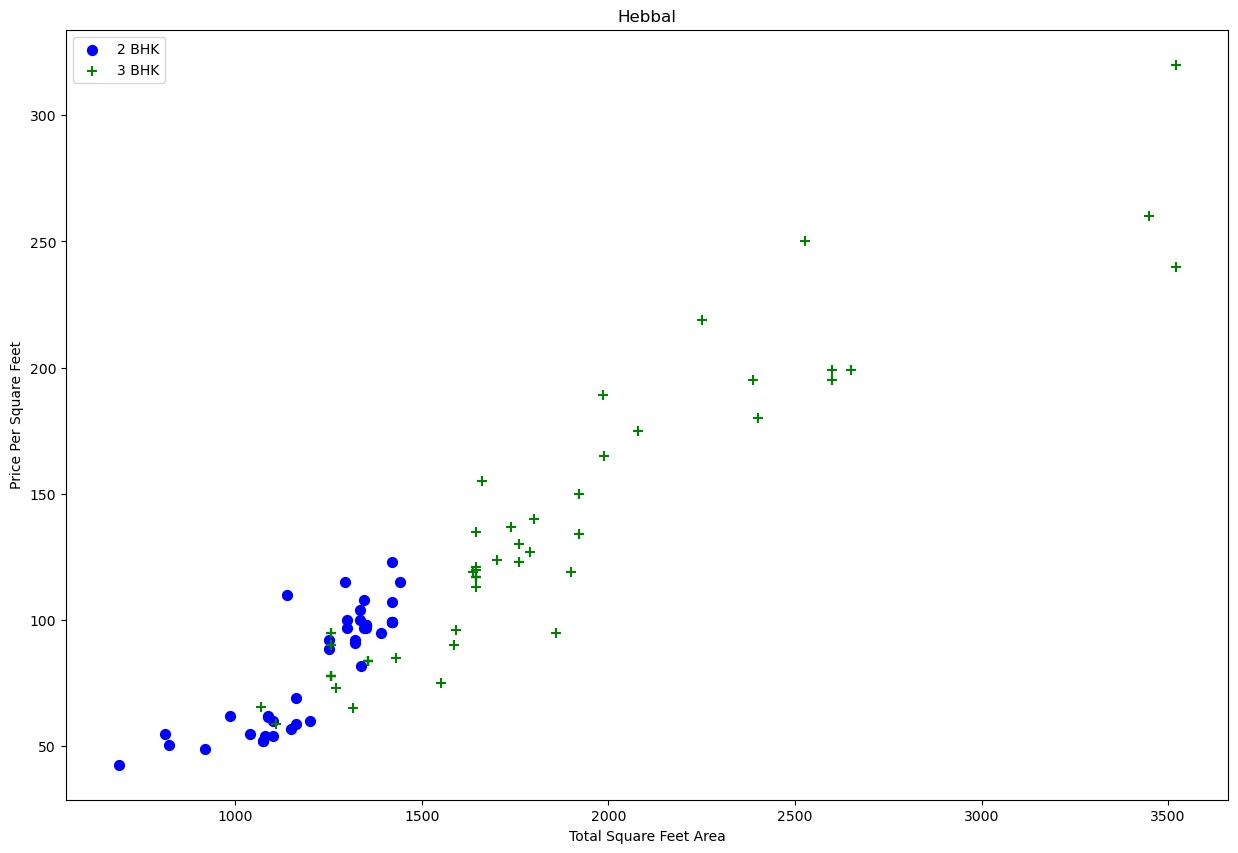

In [40]:
plot_scatter_chart(df7,"Hebbal")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):  
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]  
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

    

(7329, 7)

The function remove_bhk_outliers(df) to identify and remove outliers based on the number of bedrooms (BHK) within each location in the dataset. The function works by first grouping the data by 'location' and then by 'bhk' (number of bedrooms). For each group, it calculates the mean and standard deviation of the price per square foot and counts the number of listings. It uses these statistics to identify outliers—specifically, it flags entries where the price per square foot is lower than the mean price of properties with one fewer bedroom, provided that there are more than 5 such properties in the comparison group. The indices of these outlier entries are collected and used to filter out these records from the original dataset. The resulting DataFrame (df8) is free from these identified BHK-related outliers, thereby enhancing the consistency and accuracy of the data for further analysis. The df8.shape command provides the dimensions of the cleaned dataset after outlier removal.

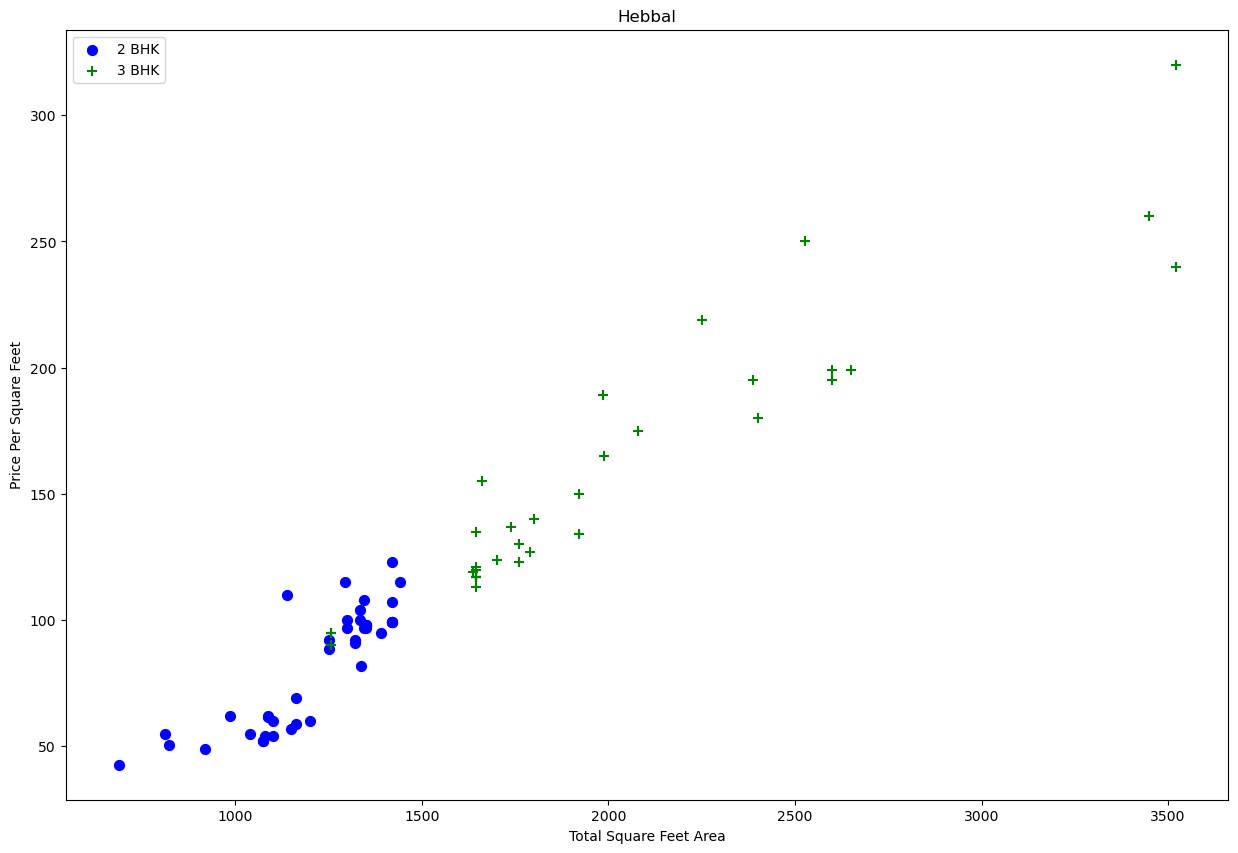

In [42]:
plot_scatter_chart(df8,"Hebbal")

#### Histogram

A histogram to visualize the distribution of the price per square foot in the cleaned dataset (df8). The matplotlib library is used, with the figure size set to 20x10 inches for better readability. The plt.hist function creates the histogram, where the price_per_sqft column is plotted on the x-axis, and the frequency (or count) of occurrences is shown on the y-axis. The rwidth=0.8 parameter adjusts the width of the bars in the histogram to make them more distinct. The x-axis is labeled "Price Per Square Feet" and the y-axis is labeled "count" to clearly indicate what is being measured. This histogram provides a visual summary of the distribution of property prices per square foot, helping to identify patterns, central tendencies, and any potential skewness in the dataset.

Text(0, 0.5, 'count')

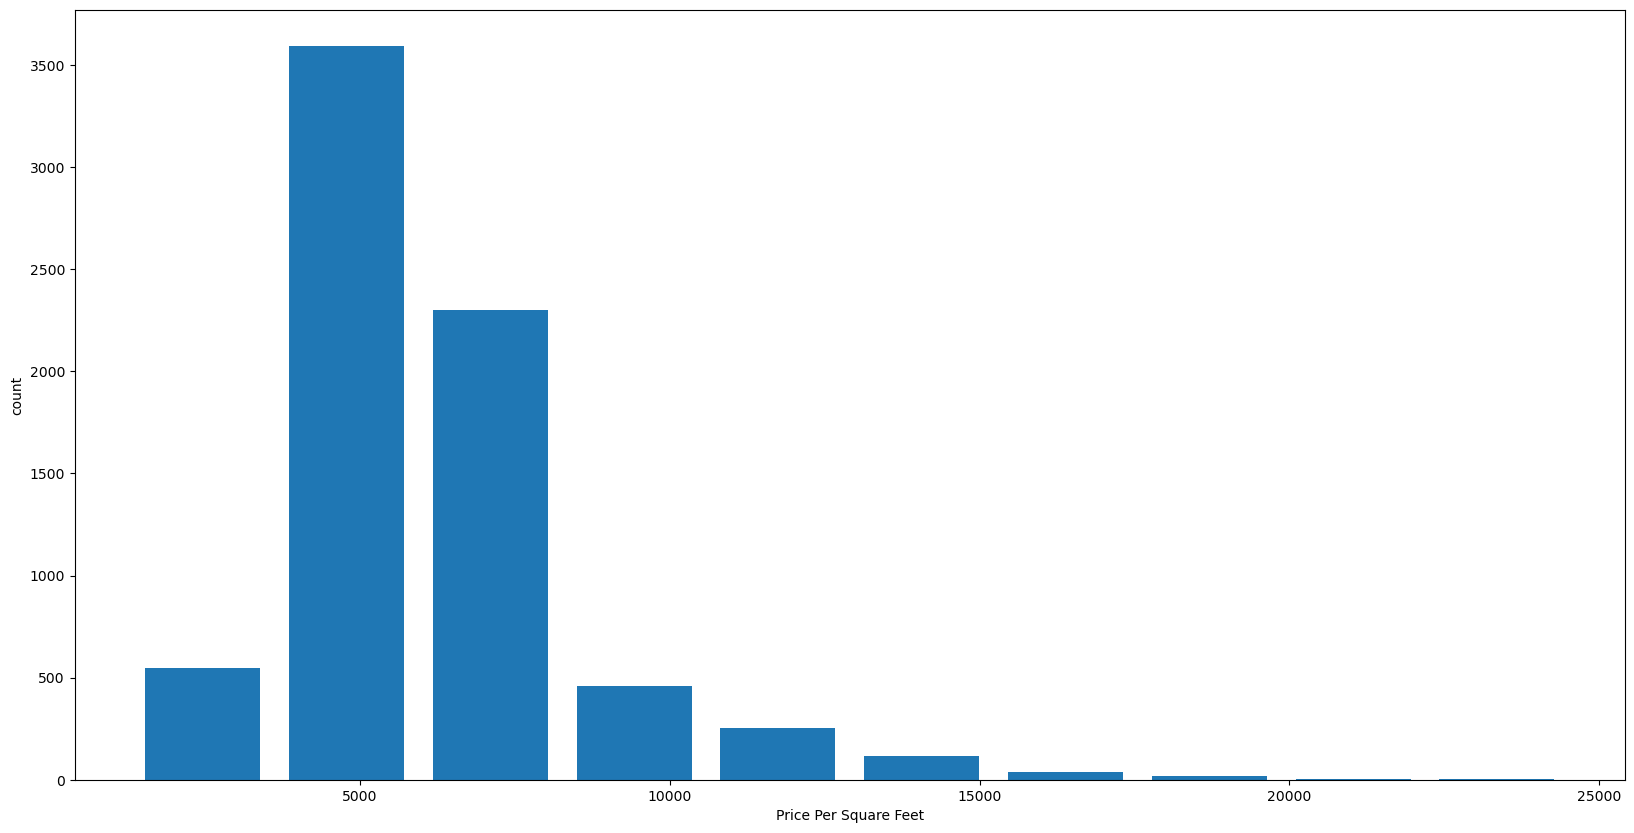

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

#### Removing Potential Inconsistencies

Analyzing and visualizing the 'bath' (number of bathrooms) data in the cleaned dataset (df8). First, df8.bath.unique() is used to list the unique values in the 'bath' column, helping to understand the range of bathroom counts present. The line df8[df8.bath>10] identifies listings with more than 10 bathrooms, which may indicate potential data anomalies or outliers. A histogram is then created to visualize the distribution of the number of bathrooms using plt.hist, with the x-axis labeled "Number of Bathrooms" and the y-axis "Count". This histogram provides insights into the frequency of various bathroom counts across the dataset. Additionally, df10 is created by dropping the 'size' and 'price_per_sqft' columns from df9, which might be part of the data preprocessing steps. Finally, df8[df8.bath>df8.bhk+2] filters out listings where the number of bathrooms exceeds the number of bedrooms by more than 2, highlighting potential inconsistencies in the data. This helps in ensuring the dataset remains reliable and realistic.

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

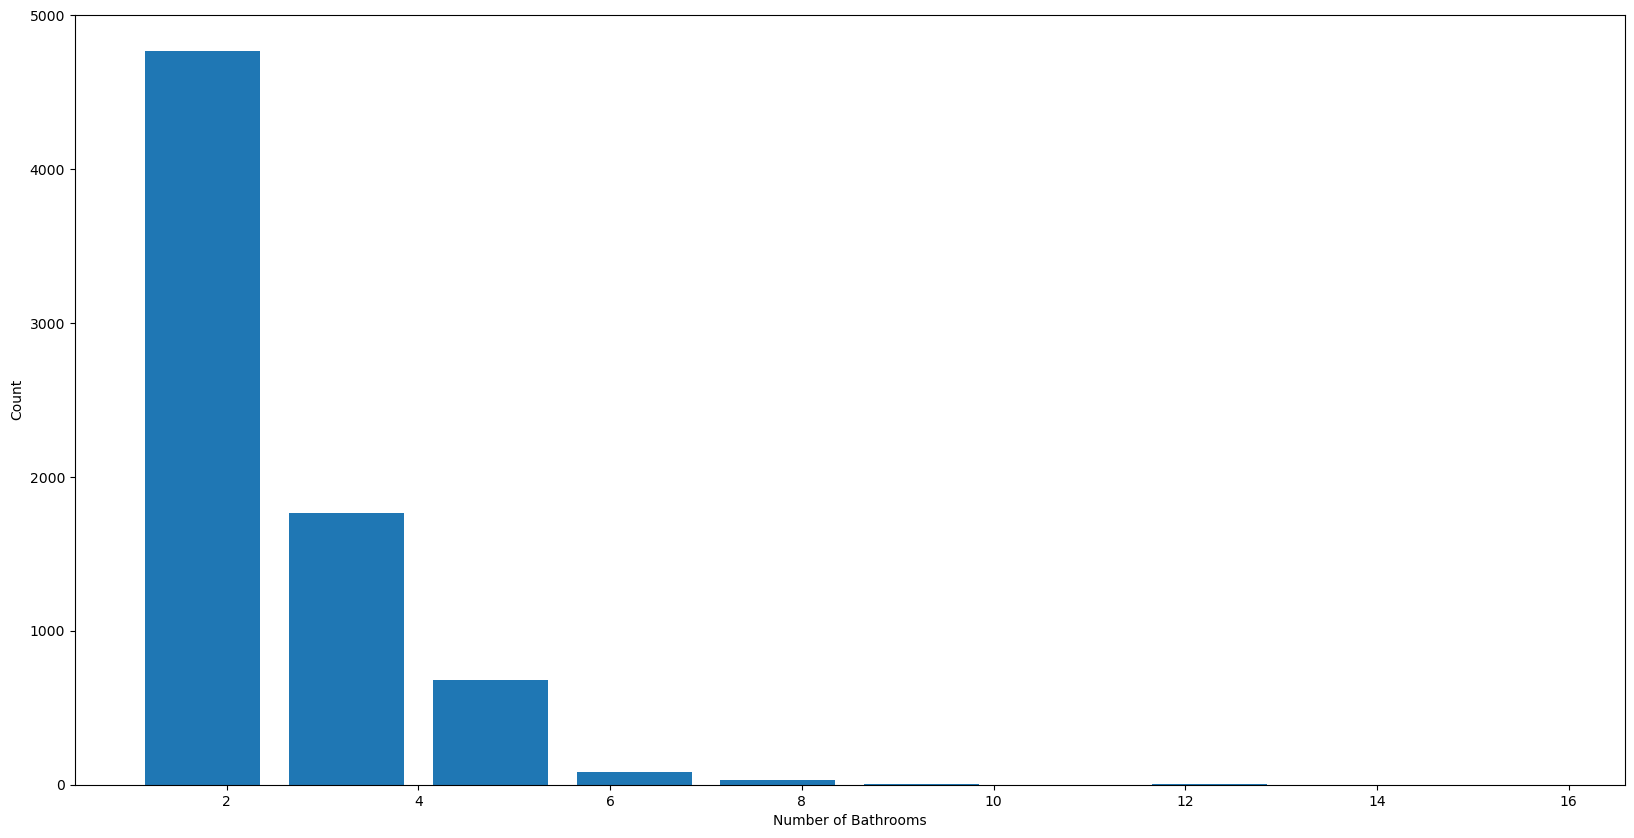

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

## 4.Feature Engineering

In this section, additional features are created to improve model performance. The location column is encoded using one-hot encoding to convert categorical variables into numerical format. Features such as price_per_sqft are dropped as they are no longer needed after encoding and preprocessing. The dataset is then split into features (X) and target (Y), where X includes all features except price, and Y is the target variable price.

In [49]:
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [50]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 = df11.drop('location', axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.shape

(7251, 245)

## 5. Model Building and Evaluation

This section involves building and evaluating machine learning models. The data is split into training and test sets. A Linear Regression model is trained using the training data, and its performance is evaluated on the test data. Cross-validation is performed using ShuffleSplit to assess the model’s robustness. Grid Search is used to find the best model and hyperparameters from a set of algorithms including Linear Regression, Lasso, and Decision Tree Regressor. Finally, the trained model is used to make predictions, and both the model and feature columns are saved for future use.

In [54]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
Y = df12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test,Y_test)

0.845227769787429

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,Y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

####  Finding The Best Model

This code defines a function, find_best_model_using_gridsearchcv(X, Y), to identify the best machine learning model for a given dataset by evaluating various algorithms and their hyperparameters. The function tests three types of models: LinearRegression, Lasso, and DecisionTreeRegressor, each with specific hyperparameters. For LinearRegression, it evaluates whether to fit the intercept and whether the coefficients should be positive. For Lasso, it explores different values of the regularization parameter alpha and the method of coefficient selection. For DecisionTreeRegressor, it assesses different criteria for splitting nodes and the splitter method.

A ShuffleSplit cross-validation strategy is used, dividing the dataset into training and testing subsets multiple times to ensure robust evaluation. GridSearchCV performs an exhaustive search over the specified hyperparameters for each model. The function collects and stores the best score and corresponding hyperparameters for each model in a DataFrame. This DataFrame, returned by the function, provides a comparative overview of the models' performance and their optimal configurations. This process helps in selecting the most effective model and parameter settings for the given regression problem.

In [59]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'], 
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

b
find_best_model_using_gridsearchcv(X, Y)



,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720981,"{'criterion': 'squared_error', 'splitter': 'ra..."


#### Predicting the Price

The predict_price(location, sqft, bath, bhk) function is designed to predict the price of a property based on its features using a trained linear regression model (lr_clf). The function takes four inputs: location (the property’s location), sqft (total square footage), bath (number of bathrooms), and bhk (number of bedrooms). It begins by determining the index of the location in the feature set X.columns, which is used to identify the corresponding feature in the model. A zero-initialized array x with a length equal to the number of columns in X is created to represent the feature vector for the property. The sqft, bath, and bhk values are assigned to the first three positions of this array. If the location is found in the feature set (i.e., loc_index is non-negative), the corresponding position in the array is set to 1 to indicate the presence of that location. The function then uses the trained linear regression model to predict the price based on this feature vector and returns the predicted value. This function is useful for making price predictions for new properties based on their attributes.

In [60]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [61]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [62]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\abiji\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [63]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\abiji\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395199

In [64]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\abiji\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006965

## Exporting the Model 

Save the trained machine learning model (lr_clf) to a file for future use. It utilizes the pickle module, which allows for serializing Python objects into a byte stream and deserializing them back into objects. The open function is used with the 'wb' (write binary) mode to create a new file named 'banglore_home_prices_model.pickle' or overwrite it if it already exists. The pickle.dump function then writes the lr_clf model object to this file. Saving the model in this manner enables it to be easily reloaded later without needing to retrain it, facilitating efficient deployment and use of the model for making predictions or further analysis.

Save the column names of the feature set X into a JSON file for later use. It first constructs a dictionary named columns with a key 'data_columns', which contains a list of column names converted to lowercase. This ensures consistency and avoids issues with case sensitivity when these column names are used later. The json.dumps function serializes this dictionary into a JSON-formatted string. The open function is used with the "w" (write) mode to create a new file named "columns.json" or overwrite it if it already exists. The JSON string is then written to this file using f.write(). Storing the column names in a JSON file allows for easy retrieval and use of the column names in future data processing or model prediction tasks, ensuring that the feature set remains aligned with the original model's expectations.

In [65]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))